In [1]:
%matplotlib notebook
import lalsimulation,lal
help(lal)
import matplotlib.pyplot as plt
import numpy as np
import subprocess

Help on package lal:

NAME
    lal - # Import SWIG wrappings, if available

FILE
    /Users/abhirupghosh/opt/lalsuite_pSEOBNRv4HM_20181222_0c4d6dec_fracdev/lib/python2.7/site-packages/lal/__init__.py

PACKAGE CONTENTS
    _lal
    git_version
    gpstime
    lal
    rate
    series
    spectrum (package)
    utils (package)

CLASSES
    __builtin__.SwigPyObject(__builtin__.object)
        AdaptiveRungeKuttaIntegrator
        AddVectorsIn
        AverageSpectrumParams
        Bitset
        CHARVector
        CHARVectorSequence
        COMPLEX16Array
        COMPLEX16ArraySequence
        COMPLEX16FFTPlan
        COMPLEX16FrequencySeries
        COMPLEX16IIRFilter
        COMPLEX16TimeArraySeries
        COMPLEX16TimeSeries
        COMPLEX16TimeVectorSeries
        COMPLEX16Vector
        COMPLEX16VectorAligned
        COMPLEX16VectorSequence
        COMPLEX16ZPGFilter
        COMPLEX8Array
        COMPLEX8ArraySequence
        COMPLEX8FFTPlan
        COMPLEX8FrequencySeries
        COM

<IPython.core.display.Javascript object>


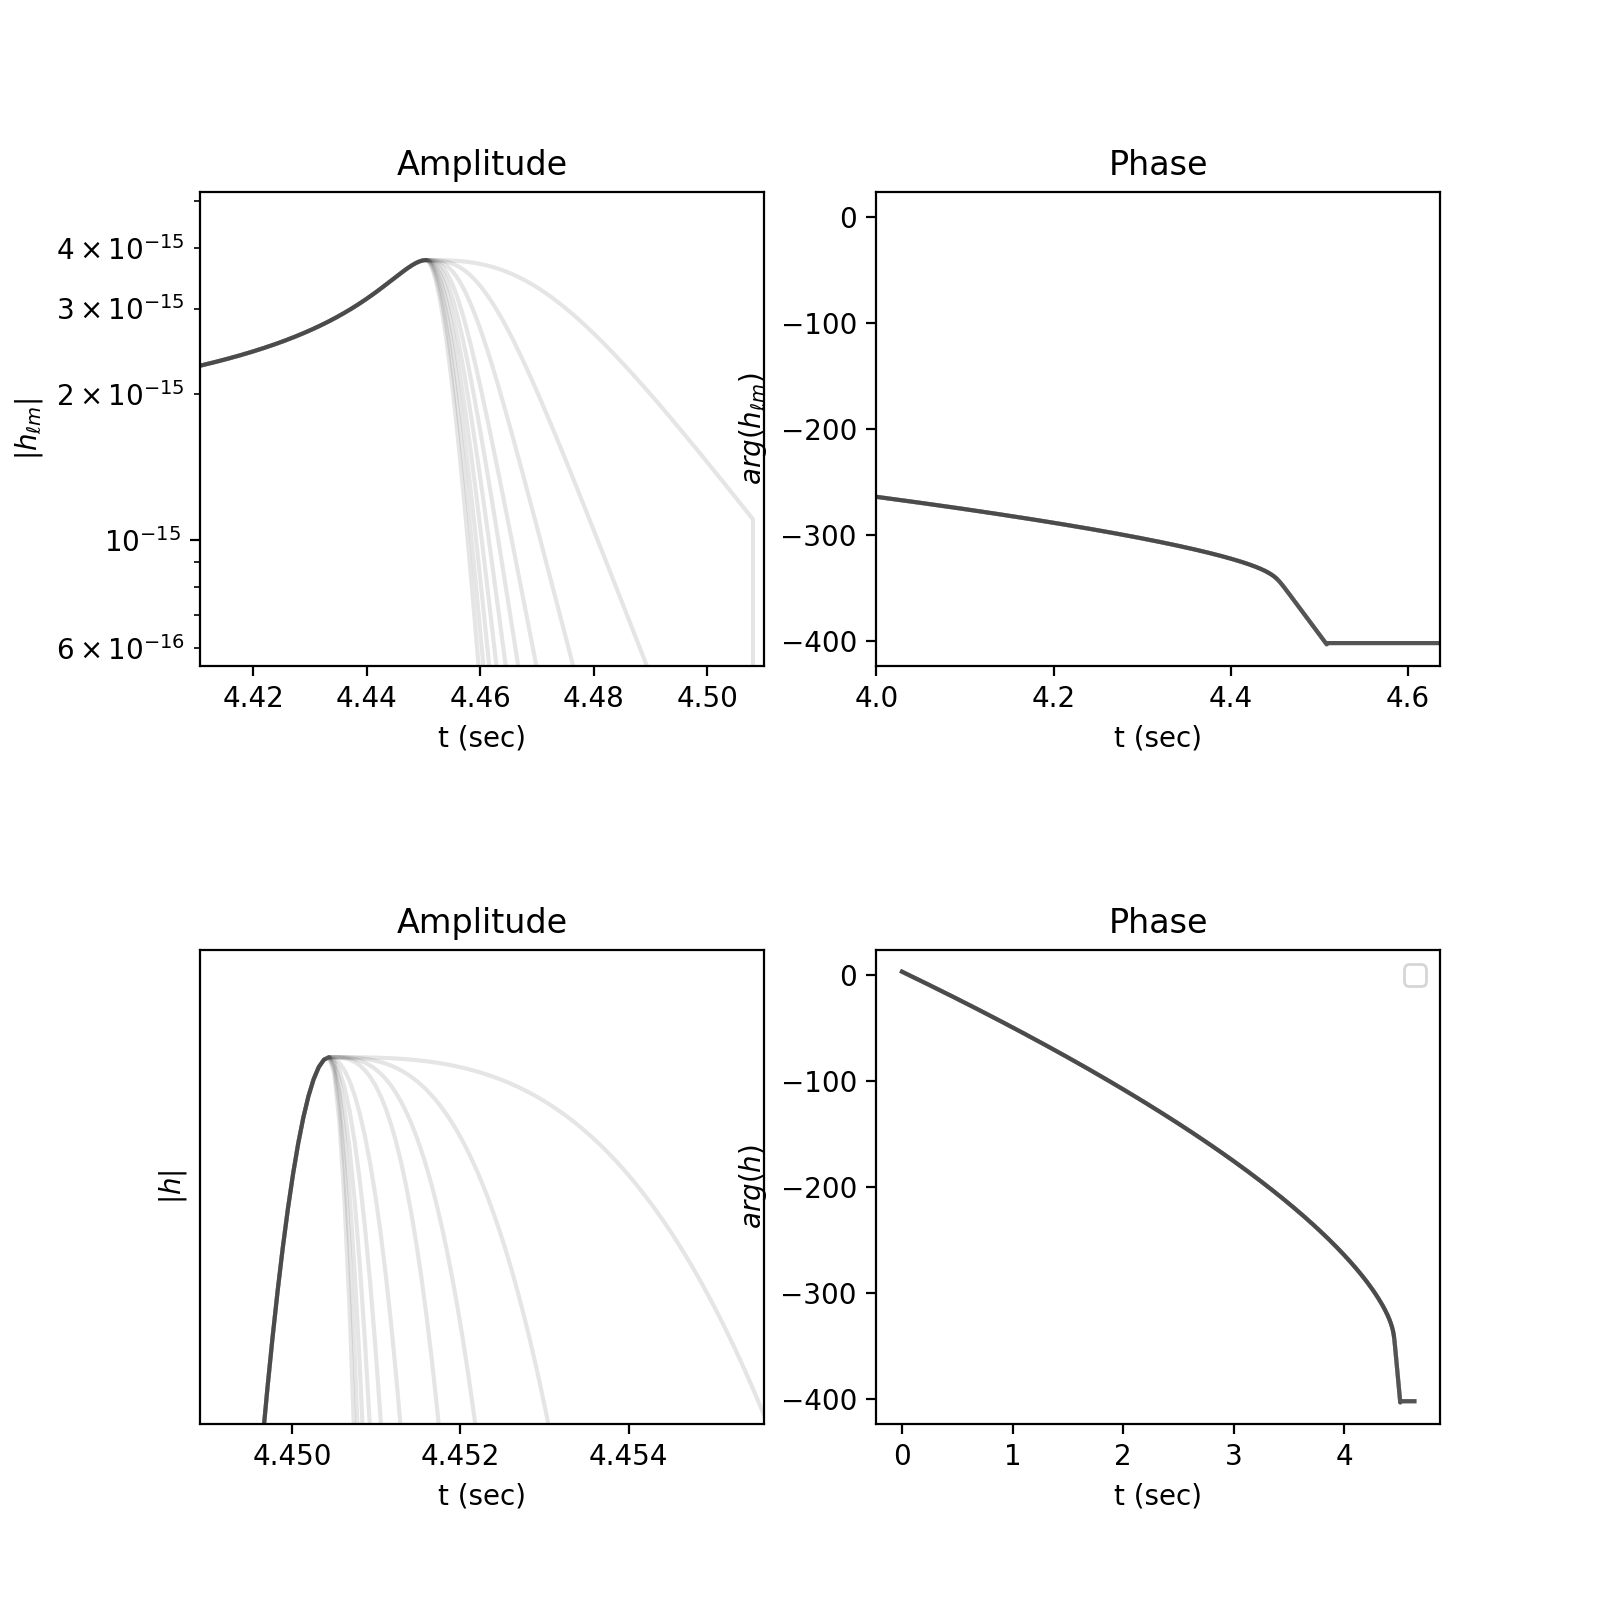

0.0
Loading mode 5 5
Loading mode 4 4
Loading mode 2 1
Loading mode 3 3
Loading mode 2 2


/Users/abhirupghosh/src/pycbc/lib/python2.7/site-packages/numpy/lib/function_base.py:2186: RuntimeWarning: invalid value encountered in greater
  _nx.copyto(ddmod, pi, where=(ddmod == -pi) & (dd > 0))
/Users/abhirupghosh/src/pycbc/lib/python2.7/site-packages/numpy/lib/function_base.py:2188: RuntimeWarning: invalid value encountered in less
  _nx.copyto(ph_correct, 0, where=abs(dd) < discont)
/Users/abhirupghosh/src/pycbc/lib/python2.7/site-packages/ipykernel_launcher.py:90: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
/Users/abhirupghosh/src/pycbc/lib/python2.7/site-packages/ipykernel_launcher.py:124: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.


34.67936903693203
Loading mode 5 5
Loading mode 4 4
Loading mode 2 1
Loading mode 3 3
Loading mode 2 2
69.35873807386407
Loading mode 5 5
Loading mode 4 4
Loading mode 2 1
Loading mode 3 3
Loading mode 2 2
104.03810711079612
Loading mode 5 5
Loading mode 4 4
Loading mode 2 1
Loading mode 3 3
Loading mode 2 2
138.71747614772815
Loading mode 5 5
Loading mode 4 4
Loading mode 2 1
Loading mode 3 3
Loading mode 2 2
173.39684518466018
Loading mode 5 5
Loading mode 4 4
Loading mode 2 1
Loading mode 3 3
Loading mode 2 2
208.07621422159224
Loading mode 5 5
Loading mode 4 4
Loading mode 2 1
Loading mode 3 3
Loading mode 2 2
242.75558325852427
Loading mode 5 5
Loading mode 4 4
Loading mode 2 1
Loading mode 3 3
Loading mode 2 2
277.4349522954563
Loading mode 5 5
Loading mode 4 4
Loading mode 2 1
Loading mode 3 3
Loading mode 2 2
312.11432133238833
Loading mode 5 5
Loading mode 4 4
Loading mode 2 1
Loading mode 3 3
Loading mode 2 2
346.79369036932036
Loading mode 5 5
Loading mode 4 4
Loading mode 2

In [6]:
# Define binary parameters
nqcCoeffsInput=lal.CreateREAL8Vector(10) ##This will be unused, but it is necessary
m1 = 50.0*lal.MSUN_SI
m2 = 50.0*lal.MSUN_SI
phi_c = 0.
f_start22 = 8. #Frequency of the 22 mode at which the signal starts
distance = 500.0*lal.PC_SI
spin1_z = 0.
spin2_z =  0.
deltaT = 1./16384.
domega220_theor = 0.
dtauinv220_theor = 0.
domega210_theor = 0.
dtauinv210_theor = 0.
domega330_theor = 0.
dtauinv330_theor = 0.
domega440_theor = 0.
dtauinv440_theor = 0.
domega550_theor = 0.
dtauinv550_theor = 0.

dtauinv220_list = np.linspace(-1, 1., 11)

plt.figure(figsize=(8,8))
for dtauinv220 in dtauinv220_list:
    
        print (1+dtauinv220)*173.3968451846601795
    
        # Generate the modes
        sphtseries, dyn, dynHi = lalsimulation.SimIMRSpinAlignedEOBModes(deltaT, m1, m2, f_start22, distance, spin1_z, spin2_z,41, 0., 0., 0.,0.,0.,0.,0.,0.,1.,1., domega220_theor, dtauinv220, domega210_theor, dtauinv210_theor, domega330_theor, dtauinv330_theor, domega440_theor, dtauinv440_theor, domega550_theor, dtauinv550_theor, nqcCoeffsInput, 0)

        # Read the modes
        hlm = {}

        ##55 mode
        modeL = sphtseries.l
        modeM = sphtseries.m
        print 'Loading mode', modeL, modeM
        h55 = sphtseries.mode.data.data #This is h_55
        hlm[(modeL, modeM)] = h55

        ##44 mode
        modeL = sphtseries.next.l
        modeM = sphtseries.next.m
        print 'Loading mode', modeL, modeM
        h44 = sphtseries.next.mode.data.data #This is h_44
        hlm[(modeL, modeM)] = h44

        ##21 mode
        modeL = sphtseries.next.next.l
        modeM = sphtseries.next.next.m
        print 'Loading mode', modeL, modeM
        h21 = sphtseries.next.next.mode.data.data #This is h_21
        hlm[(modeL, modeM)] = h21

        ##33 mode
        modeL = sphtseries.next.next.next.l
        modeM = sphtseries.next.next.next.m
        print 'Loading mode', modeL, modeM
        h33 = sphtseries.next.next.next.mode.data.data #This is h_33
        hlm[(modeL, modeM)] = h33
        
        ##22 mode
        modeL = sphtseries.next.next.next.next.l
        modeM = sphtseries.next.next.next.next.m
        print 'Loading mode', modeL, modeM
        h22 = sphtseries.next.next.next.next.mode.data.data #This is h_22
        hlm[(modeL, modeM)] = h22

        ##time array (s)
        time_array = np.arange(0,len(h22)*deltaT,deltaT)

        # Plotting amplitude and phase of the single modes

        plt.subplot(221)
        plt.semilogy(time_array,np.abs(h22), color='k', alpha=0.1)
        plt.xlabel('t (sec)')
        plt.ylabel('$|h_{\ell m}|$')
        plt.title('Amplitude')
        #plt.legend()
        plt.xlim([4, time_array[-1]])
        plt.subplot(222)
        plt.plot(time_array,np.unwrap(np.angle(h22)), color='k', alpha=0.1)
        plt.xlabel('t (sec)')
        plt.ylabel('$arg(h_{\ell m})$')
        plt.title('Phase')
        plt.xlabel('t (sec)')
        plt.subplots_adjust(hspace=0.4)
        plt.xlim([4, time_array[-1]])
        plt.hold(True)
        
        # Generate the full waveform
        paramdict = lal.CreateDict()
        lalsimulation.SimInspiralWaveformParamsInsertDOmega220(paramdict, domega220_theor)
        lalsimulation.SimInspiralWaveformParamsInsertDTauInv220(paramdict, dtauinv220)
        lalsimulation.SimInspiralWaveformParamsInsertDOmega210(paramdict, domega210_theor)
        lalsimulation.SimInspiralWaveformParamsInsertDTauInv210(paramdict, dtauinv210_theor)
        lalsimulation.SimInspiralWaveformParamsInsertDOmega330(paramdict, domega330_theor)
        lalsimulation.SimInspiralWaveformParamsInsertDTauInv330(paramdict, dtauinv330_theor)
        lalsimulation.SimInspiralWaveformParamsInsertDOmega440(paramdict, domega440_theor)
        lalsimulation.SimInspiralWaveformParamsInsertDTauInv440(paramdict, dtauinv440_theor)
        lalsimulation.SimInspiralWaveformParamsInsertDOmega550(paramdict, domega550_theor)
        lalsimulation.SimInspiralWaveformParamsInsertDTauInv550(paramdict, dtauinv550_theor)
        inclination = 0.
        hp, hc =  lalsimulation.SimInspiralChooseTDWaveform(m1, m2,  0., 0., spin1_z, 0., 0., spin2_z, distance, inclination, phi_c, 0., 0., 0., deltaT, f_start22, f_start22, paramdict, lalsimulation.SEOBNRv4HM)
        h = hp.data.data - 1j*hc.data.data
        
        # Plot the waveform
        plt.subplot(223)
        plt.semilogy(time_array, np.abs(h), color='k', alpha=0.1)
        plt.xlabel('t (sec)')
        plt.ylabel('$|h|$')
        plt.title('Amplitude')
        #plt.xlim([4, time_array[-1]])
        plt.subplot(224)
        plt.plot(time_array,np.unwrap(np.angle(h)), color='k', alpha=0.1)
        plt.xlabel('t (sec)')
        plt.ylabel('$arg(h)$')
        plt.title('Phase') 
        plt.xlabel('t (sec)')  
        #plt.xlim([4, time_array[-1]])
        plt.legend()
        plt.subplots_adjust(hspace=0.6)
        plt.hold(True)
        
plt.show()        

In [ ]:
173.3968451846601795

In [ ]:
help(lalsimulation.SimInspiralWaveformParamsInsertNonGRTau550)